In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')


Get and Evaluate Lien Viet Post Bank Stock Data

In [ ]:
# Load historical stock data
LienPostBank = pd.read_csv("LPB_data.csv", parse_dates=['time'], index_col='time')
LienPostBank = LienPostBank.sort_index()
LienPostBank

,open,high,low,close,volume,symbol
time,,,,,,
2020-01-02,2.73,2.80,2.66,2.73,416346,LPB
2020-01-03,2.73,2.73,2.70,2.73,79257,LPB
2020-01-06,2.70,2.70,2.66,2.66,118620,LPB
2020-01-07,2.66,2.70,2.62,2.66,144955,LPB
2020-01-08,2.62,2.66,2.62,2.66,197038,LPB
...,...,...,...,...,...,...
2025-09-22,46.55,47.50,46.00,46.50,2191000,LPB
2025-09-23,46.70,47.00,45.55,46.55,1684200,LPB
2025-09-24,46.70,47.50,46.00,47.45,1732800,LPB


In [3]:
lpb_close = pd.DataFrame(LienPostBank['close'])
lpb_close = lpb_close.dropna()
lpb_close.head()

,close
time,
2020-01-02,2.73
2020-01-03,2.73
2020-01-06,2.66
2020-01-07,2.66
2020-01-08,2.66


In [4]:
lpb_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1421 entries, 2020-01-02 to 2025-09-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1421 non-null   float64
dtypes: float64(1)
memory usage: 22.2 KB


In [5]:
lpb_close.describe()

,close
count,1421.000000
mean,13.696312
std,10.027352
min,2.210000
25%,7.090000
50%,10.570000
75%,16.030000
max,48.400000


Plotting Lien Viet Post Bank (LPB) Closing Prices from 2020-01-02 to 2025-09-26


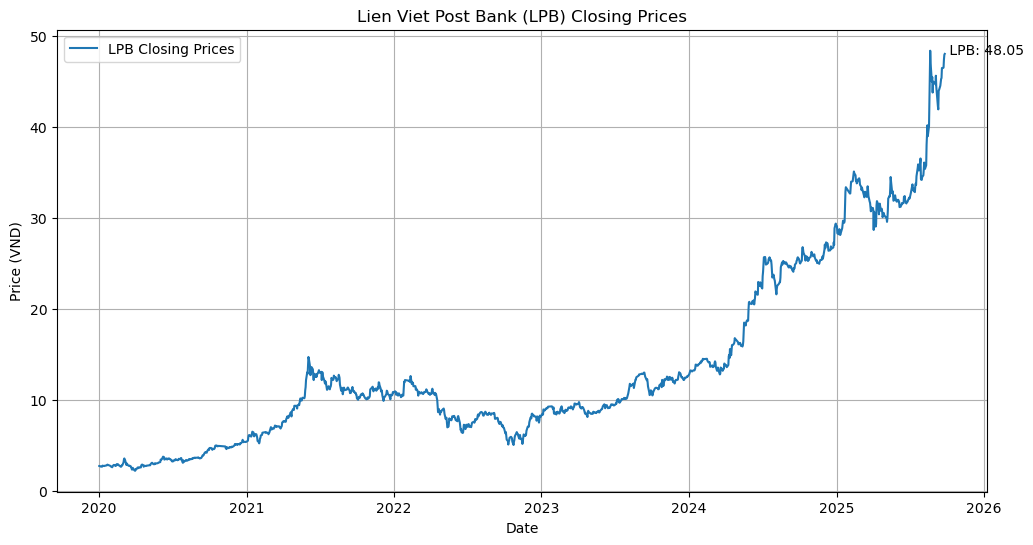

In [6]:
# Plot closing prices
print(f"Plotting Lien Viet Post Bank (LPB) Closing Prices from {lpb_close.index.min().date()} to {lpb_close.index.max().date()}")
plt.figure(figsize=(12, 6))
plt.plot(lpb_close, label='LPB Closing Prices')
# Show the last price on the plot
plt.annotate(f' LPB: {lpb_close.iloc[-1, 0]:.2f}', 
             xy=(lpb_close.index[-1], lpb_close.iloc[-1, 0]), 
             xytext=(lpb_close.index[-1], lpb_close.iloc[-1, 0]))
plt.title('Lien Viet Post Bank (LPB) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.grid()
plt.show()

In [7]:
# Resample to monthly frequency, taking the last available price each month
lpb_close.index = pd.DatetimeIndex(lpb_close.index)
monthly_lpb = lpb_close.resample('BM').last()
monthly_lpb

,close
time,
2020-01-31,2.66
2020-02-28,2.81
2020-03-31,2.21
2020-04-30,2.77
2020-05-29,3.12
...,...
2025-05-30,31.80
2025-06-30,32.25
2025-07-31,34.20


Plotting Resampled Lien Viet Post Bank (LPB) Closing Prices from 2020-01-31 to 2025-09-30


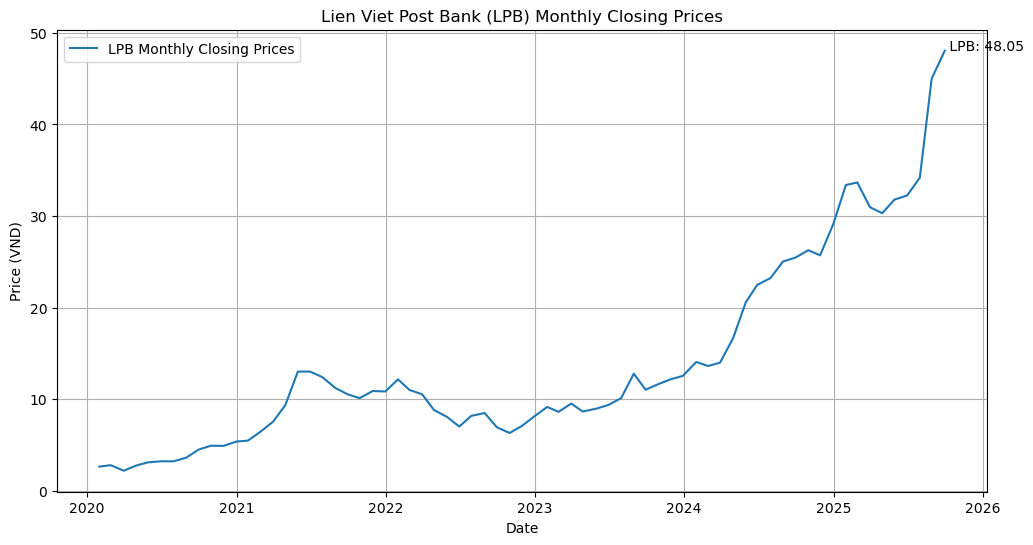

In [8]:
# Plot closing prices after resampling
print(f"Plotting Resampled Lien Viet Post Bank (LPB) Closing Prices from {monthly_lpb.index.min().date()} to {monthly_lpb.index.max().date()}")
plt.figure(figsize=(12, 6))
plt.plot(monthly_lpb, label='LPB Monthly Closing Prices')
# Show the last price on the plot
plt.annotate(f' LPB: {monthly_lpb.iloc[-1, 0]:.2f}', 
             xy=(monthly_lpb.index[-1], monthly_lpb.iloc[-1, 0]), 
             xytext=(monthly_lpb.index[-1], monthly_lpb.iloc[-1, 0]))
plt.title('Lien Viet Post Bank (LPB) Monthly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Change prices in 5-day periods (weekly changes)
lpb_close_changes = pd.DataFrame(index=lpb_close.index)
lpb_close_changes['1_day_change'] = lpb_close['close'] - lpb_close['close'].shift(1)
lpb_close_changes['3_day_change'] = lpb_close['close'] - lpb_close['close'].shift(3)
lpb_close_changes['5_day_change'] = lpb_close['close'] - lpb_close['close'].shift(5)
lpb_close_changes.head(10)

,1_day_change,3_day_change,5_day_change
time,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,0.00,NaN,NaN
2020-01-06,-0.07,NaN,NaN
2020-01-07,0.00,-0.07,NaN
2020-01-08,0.00,-0.07,NaN
2020-01-09,0.00,0.00,-0.07
2020-01-10,0.11,0.11,0.04
2020-01-13,-0.04,0.07,0.07
2020-01-14,0.00,0.07,0.07


In [10]:
# Daily changes and log returns
lpb_close['change_1d'] = lpb_close['close'] - lpb_close['close'].shift(1)
lpb_close['ln_change_1d'] = np.log(lpb_close['close'] / lpb_close['close'].shift(1))
lpb_close.head(10)

,close,change_1d,ln_change_1d
time,,,
2020-01-02,2.73,NaN,NaN
2020-01-03,2.73,0.00,0.000000
2020-01-06,2.66,-0.07,-0.025975
2020-01-07,2.66,0.00,0.000000
2020-01-08,2.66,0.00,0.000000
2020-01-09,2.66,0.00,0.000000
2020-01-10,2.77,0.11,0.040521
2020-01-13,2.73,-0.04,-0.014546
2020-01-14,2.73,0.00,0.000000


Histogram of Daily Log Returns for LPB


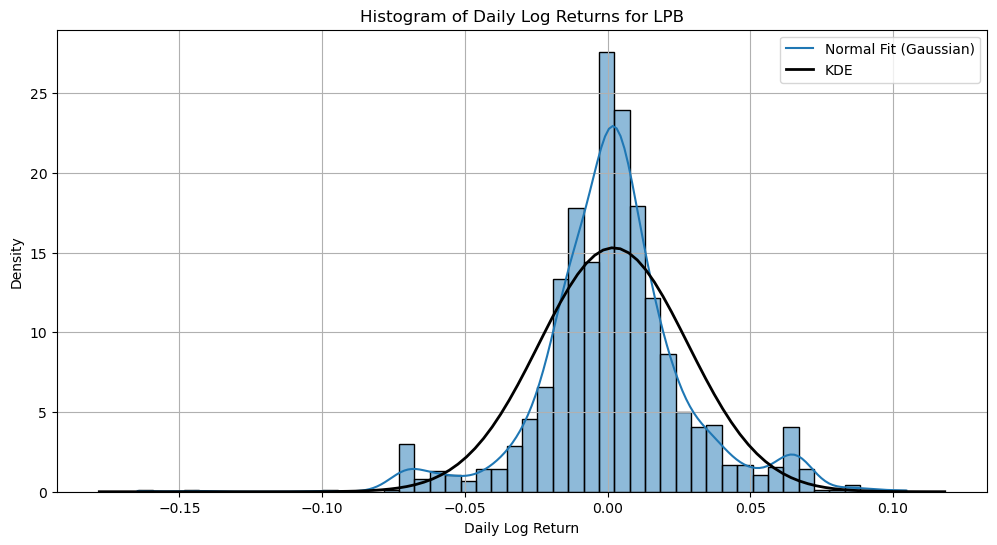

In [11]:
# Histogram of daily returns
print("Histogram of Daily Log Returns for LPB")
plt.figure(figsize=(12, 6))
sns.histplot(lpb_close['ln_change_1d'].dropna(), bins=50, kde=True, stat="density")
mu, std = norm.fit(lpb_close['ln_change_1d'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) # Probability density function
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram of Daily Log Returns for LPB')
plt.xlabel('Daily Log Return')
plt.ylabel('Density')
plt.legend(['Normal Fit (Gaussian)', 'KDE'])
plt.grid()
plt.show()

Lien Viet Post Bank Stock daily returns deviate from normal distribution with higher kurtosis and negative skewness.

In [12]:
# Standard statistical measures
lpb_close['ln_change_1d'].dropna().describe()


count    1420.000000
mean        0.002020
std         0.026085
min        -0.164622
25%        -0.011011
50%         0.000000
75%         0.013209
max         0.104649
Name: ln_change_1d, dtype: float64

In [13]:
# Calculate standard deviation (volatility) of daily log returns, typically over a 21-day window
lpb_close['daily_volatility'] = lpb_close['ln_change_1d'].rolling(window=21).std().shift()
# Calculate expected change based on standard deviation
lpb_close['expected_change'] = lpb_close['daily_volatility'] * lpb_close['close']
lpb_close[['close', 'daily_volatility', 'expected_change']].dropna().head(10)

,close,daily_volatility,expected_change
time,,,
2020-02-10,2.77,0.023020,0.063767
2020-02-11,2.81,0.023966,0.067345
2020-02-12,2.77,0.023329,0.064622
2020-02-13,2.77,0.023618,0.065421
2020-02-14,2.93,0.023618,0.069200
2020-02-17,2.93,0.026403,0.077361
2020-02-18,2.85,0.025095,0.071521
2020-02-19,2.81,0.025702,0.072223
2020-02-20,2.81,0.025943,0.072898


Moving Average Forecasting

            close  moving_avg_5  moving_avg_21  moving_avg_50
time                                                         
2020-03-19   2.69         2.778       2.937143         2.8340
2020-03-20   2.69         2.746       2.931429         2.8332
2020-03-23   2.33         2.722       2.925714         2.8324
2020-03-24   2.41         2.642       2.904762         2.8258
2020-03-25   2.53         2.570       2.893333         2.8208
2020-03-26   2.37         2.530       2.887619         2.8182
2020-03-27   2.37         2.466       2.870476         2.8124
2020-03-30   2.21         2.402       2.849524         2.8044
2020-03-31   2.21         2.378       2.820952         2.7940
2020-04-01   2.41         2.338       2.777619         2.7836


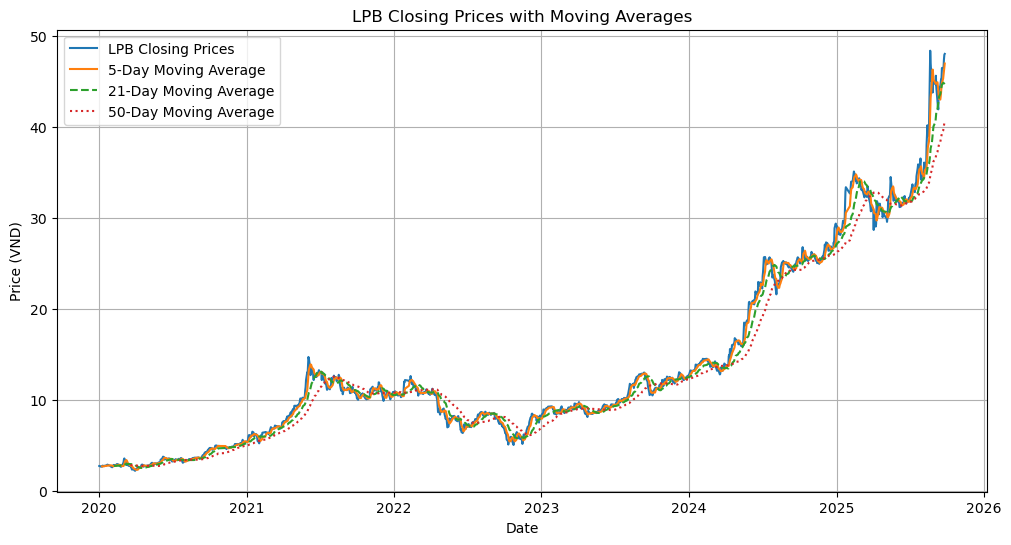

In [14]:
lpb_close['moving_avg_5'] = lpb_close['close'].rolling(window=5).mean().shift()
lpb_close['moving_avg_21'] = lpb_close['close'].rolling(window=21).mean().shift()
lpb_close['moving_avg_50'] = lpb_close['close'].rolling(window=50).mean().shift()
print(lpb_close[['close', 'moving_avg_5', 'moving_avg_21', 'moving_avg_50']].dropna().head(10))
# Plot closing prices with moving average
plt.figure(figsize=(12, 6))
plt.plot(lpb_close['close'], label='LPB Closing Prices')
plt.plot(lpb_close['moving_avg_5'], label='5-Day Moving Average', linestyle='-')
plt.plot(lpb_close['moving_avg_21'], label='21-Day Moving Average', linestyle='--')
plt.plot(lpb_close['moving_avg_50'], label='50-Day Moving Average', linestyle=':')
plt.title('LPB Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.grid()
plt.show()

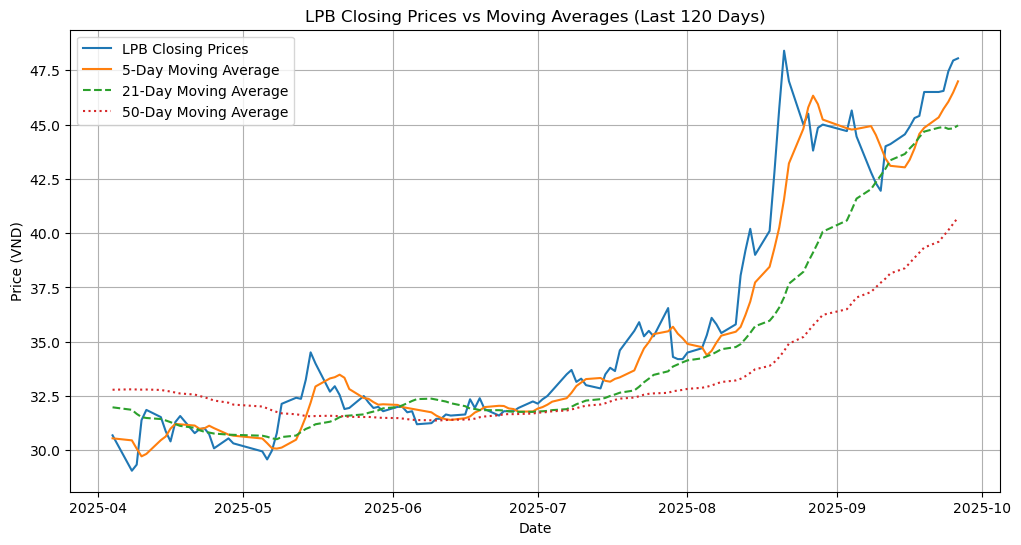

In [15]:
# Plot moving average vs actual prices from 120 days ago to today
plt.figure(figsize=(12, 6))
plt.plot(lpb_close['close'].iloc[-120:], label='LPB Closing Prices')
plt.plot(lpb_close['moving_avg_5'].iloc[-120:], label='5-Day Moving Average', linestyle='-')
plt.plot(lpb_close['moving_avg_21'].iloc[-120:], label='21-Day Moving Average', linestyle='--')
plt.plot(lpb_close['moving_avg_50'].iloc[-120:], label='50-Day Moving Average', linestyle=':')

plt.title('LPB Closing Prices vs Moving Averages (Last 120 Days)')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.grid()
plt.show()

The current price is above the 5, 21, and 50-day moving averages, indicating an upward trend. Suggests holding long positions, buy on dips to the 21-day moving average.

In [16]:
# Mean absolute deviation
lpb_close['mad_5'] = np.abs(lpb_close['close'] - lpb_close['moving_avg_5'])
lpb_close['mad_21'] = np.abs(lpb_close['close'] - lpb_close['moving_avg_21'])
lpb_close['mad_50'] = np.abs(lpb_close['close'] - lpb_close['moving_avg_50'])
print('Mean Absolute Deviation:')
print(f"MAD for 5-Day: {lpb_close['mad_5'].mean():.2f}, 21-Day: {lpb_close['mad_21'].mean():.2f}, 50-Day: {lpb_close['mad_50'].mean():.2f}")

Mean Absolute Deviation:
MAD for 5-Day: 0.35, 21-Day: 0.72, 50-Day: 1.23



Mean Absolute Deviation 5-Day: 0.35, 21-Day: 0.72, 50-Day: 1.23. That is, on average, the stock price deviates from its 5-day moving average by 0.35 units - the closest to the actual price, from its 21-day moving average by 0.72 units - a good swing-trend balance, and from its 50-day moving average by 1.23 units - the largest error.

In [17]:
# Mean percent error
lpb_close['mape_5'] = lpb_close['mad_5'] / lpb_close['close'] * 100
lpb_close['mape_21'] = lpb_close['mad_21'] / lpb_close['close'] * 100
lpb_close['mape_50'] = lpb_close['mad_50'] / lpb_close['close'] * 100
print('Mean Absolute Percentage Error:')
print(f"MAPE for 5-Day: {lpb_close['mape_5'].mean():.2f}%, 21-Day: {lpb_close['mape_21'].mean():.2f}%, 50-Day: {lpb_close['mape_50'].mean():.2f}%")

Mean Absolute Percentage Error:
MAPE for 5-Day: 2.86%, 21-Day: 5.70%, 50-Day: 9.31%


The MAPE as a bulletproof measure of forecast accuracy is 2.86% for the 5-day moving average, indicating high accuracy in short-term price predictions. The 21-day MAPE of 5.70% suggests moderate accuracy for medium-term forecasts, while the 50-day MAPE of 9.31% indicates lower accuracy for long-term predictions, reflecting increased uncertainty over longer horizons. At the line 21-day moving average, the MAPE of 5.70% indicates a reasonable level of accuracy for medium-term forecasts, suggesting that the model can predict stock prices with moderate reliability over this period. Estimating that the stock price will be within ±5.70% of the actual price when using the 21-day moving average as a predictor.

In [18]:
# Mean Squared Error
lpb_close['mse_5'] = (lpb_close['mad_5'])**2
lpb_close['mse_21'] = (lpb_close['mad_21'])**2
lpb_close['mse_50'] = (lpb_close['mad_50'])**2
print('Mean Squared Error:')
print(f"MSE for 5-Day: {lpb_close['mse_5'].mean():.2f}, 21-Day: {lpb_close['mse_21'].mean():.2f}, 50-Day: {lpb_close['mse_50'].mean():.2f}")

Mean Squared Error:
MSE for 5-Day: 0.36, 21-Day: 1.36, 50-Day: 3.77


In [19]:
# RSME
lpb_close['rmse_5'] = np.sqrt(lpb_close['mse_5'])
lpb_close['rmse_21'] = np.sqrt(lpb_close['mse_21'])
lpb_close['rmse_50'] = np.sqrt(lpb_close['mse_50'])
print('Root Mean Squared Error:')
print(f"RMSE for 5-Day: {lpb_close['rmse_5'].mean():.2f}, 21-Day: {lpb_close['rmse_21'].mean():.2f}, 50-Day: {lpb_close['rmse_50'].mean():.2f}")

Root Mean Squared Error:
RMSE for 5-Day: 0.35, 21-Day: 0.72, 50-Day: 1.23


Forecasting with Single Exponential Smoothing (SES) and Holt-Winters Methods

Single Exponential Smoothing (SES) is a time series forecasting method that applies exponentially decreasing weights to past observations. It is particularly useful for data with no clear trend or seasonal pattern. 

The formula for SES is:

$$ S_{t+1} = α * Y_t + (1 - α) * S_t $$

Where:
- $S_t$ is the smoothed value at time t
- $Y_t$ is the actual value at time t
- $α$ (alpha) is the smoothing factor (0 < $α$ < 1)

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [21]:
# Resample to weekly frequency, taking the last available price each week
y = pd.DataFrame(LienPostBank['close'])
y['close'] = pd.to_numeric(y['close'], errors='coerce')
y = y.resample('W-FRI').last().ffill()
y


,close
time,
2020-01-03,2.73
2020-01-10,2.77
2020-01-17,2.77
2020-01-24,2.88
2020-01-31,2.66
...,...
2025-08-29,45.00
2025-09-05,44.45
2025-09-12,44.10


Plotting Weekly Resampled Lien Viet Post Bank (LPB) Closing Prices from 2020-01-03 to 2025-09-26


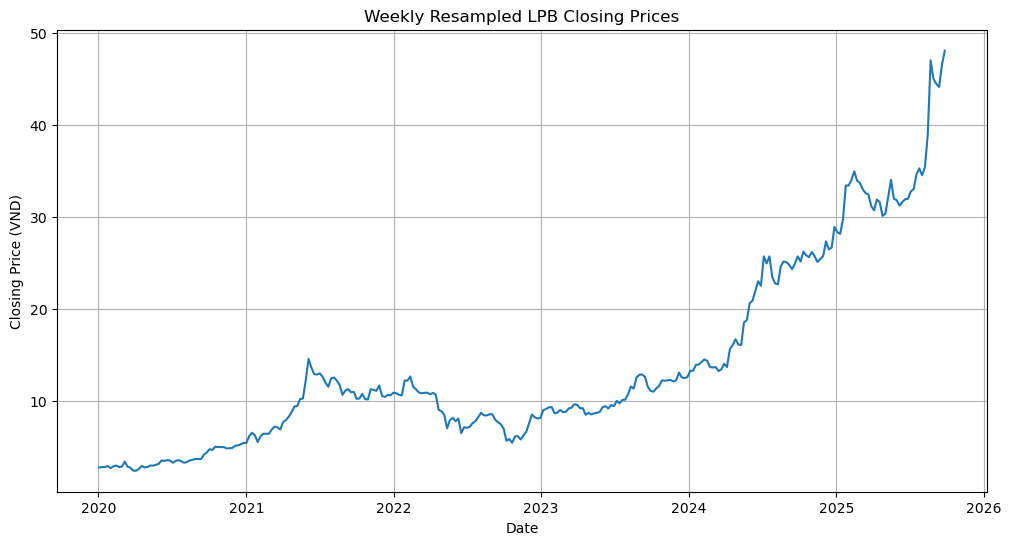

In [22]:
# Plot closing prices after resampling
print(f"Plotting Weekly Resampled Lien Viet Post Bank (LPB) Closing Prices from {y.index.min().date()} to {y.index.max().date()}")
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, linestyle='-')
plt.title('Weekly Resampled LPB Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (VND)')
plt.grid()
plt.show()

In [23]:
# Simple Exponential Smoothing Forecasting
model = SimpleExpSmoothing(y['close'], initialization_method="estimated")
model_fit = model.fit()
model_fit.predict()
print(model_fit.forecast())
y_hat = model_fit.fittedvalues
y_hat

2025-10-03    48.05
Freq: W-FRI, dtype: float64


time
2020-01-03     2.73
2020-01-10     2.73
2020-01-17     2.77
2020-01-24     2.77
2020-01-31     2.88
              ...  
2025-08-29    47.00
2025-09-05    45.00
2025-09-12    44.45
2025-09-19    44.10
2025-09-26    46.50
Freq: W-FRI, Length: 300, dtype: float64

In [24]:
# Model parameters
model_fit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2.730000132672977,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [25]:
# Varying alpha values and calculating MSE
values = pd.DataFrame({'alpha': np.zeros(10), 'MSE': np.zeros(10)})
alpha = 0.1 # alpha value from 0.1 to 1.0
for i in range(10):
    model = SimpleExpSmoothing(y['close'], initialization_method="estimated")
    model_fit = model.fit(smoothing_level=alpha, optimized=False)
    y_hat = model_fit.fittedvalues
    mse = ((y['close'] - y_hat) ** 2).mean()
    values.loc[i] = [alpha, mse]
    alpha += 0.1
print('Forecasting Results:')
values

Forecasting Results:


,alpha,MSE
0,0.1,6.038750
1,0.2,2.908677
2,0.3,1.909093
3,0.4,1.435494
4,0.5,1.176089
5,0.6,1.020850
6,0.7,0.922157
7,0.8,0.857229
8,0.9,0.814752
9,1.0,0.789368


In [26]:
# Holt-Winters Exponential Smoothing (Additive), which can model both trend and seasonality in the data.
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(y['close'], trend='add', seasonal=None, initialization_method="estimated")
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W-FRI')
forecast_series = pd.Series(forecast, index=forecast_index)
print(forecast_series)

2025-10-03    48.507782
2025-10-10    48.965564
2025-10-17    49.423346
2025-10-24    49.881128
2025-10-31    50.338909
2025-11-07    50.796691
2025-11-14    51.254473
2025-11-21    51.712255
2025-11-28    52.170037
2025-12-05    52.627819
2025-12-12    53.085601
2025-12-19    53.543383
Freq: W-FRI, dtype: float64


In [27]:
# Holt's Damped Trend Method, which is a variation of Holt's linear method that includes a damping parameter to reduce the trend over time.
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(y['close'], trend='add', seasonal=None, initialization_method="estimated", damped_trend=True)
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W-FRI')
forecast_series = pd.Series(forecast, index=forecast_index)
print(forecast_series)

2025-10-03    48.510483
2025-10-10    48.968664
2025-10-17    49.424553
2025-10-24    49.878163
2025-10-31    50.329506
2025-11-07    50.778591
2025-11-14    51.225431
2025-11-21    51.670037
2025-11-28    52.112420
2025-12-05    52.552591
2025-12-12    52.990561
2025-12-19    53.426341
Freq: W-FRI, dtype: float64
